# Ejercicio PCA en Julia

In [1]:
# Celda 1: Setup y Definición de la Matriz
using LinearAlgebra, Plots

# La matriz de covarianzas S, extraída de la imagen
#       X1      X2      X3      X4
S = [44.70   17.79    5.99    9.19;  # X1
     17.79   26.15    4.52    4.44;  # X2
      5.99    4.52    3.33    1.34;  # X3
      9.19    4.44    1.34    4.56]  # X4

println("Matriz de Covarianzas S:")
display(S)

Matriz de Covarianzas S:


4×4 Matrix{Float64}:
 44.7   17.79  5.99  9.19
 17.79  26.15  4.52  4.44
  5.99   4.52  3.33  1.34
  9.19   4.44  1.34  4.56

In [2]:
# Celda 2: Eigendecomposition
# Calculamos los eigenvalores y eigenvectores de S
F = eigen(S)
eigen_vals = F.values
eigen_vecs = F.vectors

# Es crucial ordenar los resultados de mayor a menor eigenvalor
indices_ordenados = sortperm(eigen_vals, rev=true)
eigen_vals_ordenados = eigen_vals[indices_ordenados]
eigen_vecs_ordenados = eigen_vecs[:, indices_ordenados]

println("--- Resultados Ordenados ---")
println("\nValores Propios (Eigenvalores):")
display(eigen_vals_ordenados') # Se muestra transpuesto para mejor lectura

println("\nVectores Propios (Eigenvectores):")
display(eigen_vecs_ordenados)

--- Resultados Ordenados ---

Valores Propios (Eigenvalores):


1×4 adjoint(::Vector{Float64}) with eltype Float64:
 58.4829  15.4791  2.54113  2.23688


Vectores Propios (Eigenvectores):


4×4 Matrix{Float64}:
 -0.83285    0.509525   -0.188271    0.106296
 -0.502929  -0.85526    -0.0202601   0.123218
 -0.136207  -0.0588325  -0.111467   -0.98263
 -0.186737   0.073848    0.975561   -0.0892024

In [3]:
# Celda 3: Análisis de Varianza
varianza_total = sum(eigen_vals_ordenados)
varianza_explicada = eigen_vals_ordenados ./ varianza_total
varianza_acumulada = cumsum(varianza_explicada)

println("Varianza Total (suma de eigenvalores): ", round(varianza_total, digits=2))
println("\nPorcentaje de Varianza Explicada por cada Componente:")
println("  PC1: ", round(varianza_explicada[1] * 100, digits=1), "%")
println("  PC2: ", round(varianza_explicada[2] * 100, digits=1), "%")
println("  PC3: ", round(varianza_explicada[3] * 100, digits=1), "%")
println("  PC4: ", round(varianza_explicada[4] * 100, digits=1), "%")

println("\nVarianza Acumulada:")
println("  PC1: ", round(varianza_acumulada[1] * 100, digits=1), "%")
println("  PC1 + PC2: ", round(varianza_acumulada[2] * 100, digits=1), "%")

Varianza Total (suma de eigenvalores): 78.74

Porcentaje de Varianza Explicada por cada Componente:
  PC1: 74.3%
  PC2: 19.7%
  PC3: 3.2%
  PC4: 2.8%

Varianza Acumulada:
  PC1: 74.3%
  PC1 + PC2: 93.9%


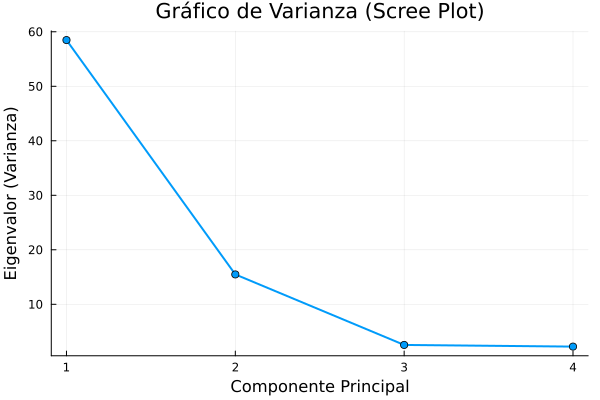

In [4]:
# Celda 4: Gráfico de Varianza
p = plot(1:4, eigen_vals_ordenados,
    seriestype=:line,
    marker=:circle,
    title="Gráfico de Varianza (Scree Plot)",
    xlabel="Componente Principal",
    ylabel="Eigenvalor (Varianza)",
    xticks=1:4,
    legend=false,
    lw=2
)
display(p)

In [5]:
# Celda 5: Construcción e Interpretación
# Extraemos los dos primeros eigenvectores (columnas 1 y 2)
pc1_vec = eigen_vecs_ordenados[:, 1]
pc2_vec = eigen_vecs_ordenados[:, 2]

println("--- Ecuaciones de los Componentes Principales ---")
println("Y1 = $(round(pc1_vec[1], digits=2))·X1 + $(round(pc1_vec[2], digits=2))·X2 + $(round(pc1_vec[3], digits=2))·X3 + $(round(pc1_vec[4], digits=2))·X4")
println("Y2 = $(round(pc2_vec[1], digits=2))·X1 + $(round(pc2_vec[2], digits=2))·X2 + $(round(pc2_vec[3], digits=2))·X3 + $(round(pc2_vec[4], digits=2))·X4")

--- Ecuaciones de los Componentes Principales ---
Y1 = -0.83·X1 + -0.5·X2 + -0.14·X3 + -0.19·X4
Y2 = 0.51·X1 + -0.86·X2 + -0.06·X3 + 0.07·X4
